In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize

In [2]:
mod_count_data = pd.read_csv("mod_data.txt", delimiter = "\t")
rules_count_data = pd.read_csv("rules_data.txt", delimiter = "\t")
subscribers_count_data = pd.read_csv("meta_data.txt", delimiter = "\t")
mod_count_data['timestamp'] = pd.to_datetime(mod_count_data['timestamp'], errors='coerce')
rules_count_data['timestamp'] = pd.to_datetime(rules_count_data['timestamp'], errors='coerce')
subscribers_count_data['timestamp'] = pd.to_datetime(subscribers_count_data['timestamp'], errors='coerce')
mod_count_data.head()

,subreddit,timestamp,mods_json,num_mods
0,ender3,2020-09-24 10:44:28,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",6
1,curseofstrahd,2020-09-24 23:40:16,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",6
2,ladiesofwrestling,2020-09-25 08:51:25,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",7
3,silhouwhat,2020-09-25 13:02:00,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",11
4,noshitouija,2020-09-25 23:57:27,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",3


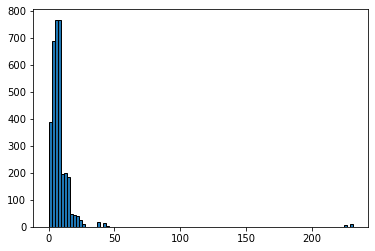

In [3]:
plt.hist(mod_count_data['num_mods'], edgecolor = 'black', bins = 100)
plt.show()

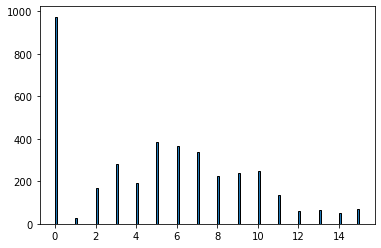

In [4]:
plt.hist(rules_count_data['num_rules'], edgecolor = 'black', bins = 150)
plt.show()

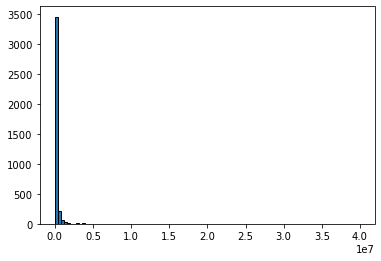

In [5]:
plt.hist(subscribers_count_data['num_subscribers'], edgecolor = 'black', bins = 100)
plt.show()

In [6]:
def select_subreddit(subreddit, data):
    filtered_data = data[data["subreddit"].str.contains(subreddit)]
    return filtered_data

In [7]:
ladiesofwrestling_mod_data = select_subreddit('ladiesofwrestling', mod_count_data)
ladiesofwrestling_mod_data["mod_churn"] = ladiesofwrestling_mod_data["num_mods"] - ladiesofwrestling_mod_data["num_mods"].shift(1)
ladiesofwrestling_mod_data["time_diff"] = ladiesofwrestling_mod_data["timestamp"].diff()
ladiesofwrestling_mod_data

/tmp/ipykernel_61/1822740429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ladiesofwrestling_mod_data["mod_churn"] = ladiesofwrestling_mod_data["num_mods"] - ladiesofwrestling_mod_data["num_mods"].shift(1)
/tmp/ipykernel_61/1822740429.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ladiesofwrestling_mod_data["time_diff"] = ladiesofwrestling_mod_data["timestamp"].diff()


,subreddit,timestamp,mods_json,num_mods,mod_churn,time_diff
2,ladiesofwrestling,2020-09-25 08:51:25,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",7,NaN,NaT
206,ladiesofwrestling,2020-11-04 05:19:31,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",7,0.0,39 days 20:28:06
611,ladiesofwrestling,2020-12-03 13:06:07,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",7,0.0,29 days 07:46:36
816,ladiesofwrestling,2021-01-03 17:58:42,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",7,0.0,31 days 04:52:35
1020,ladiesofwrestling,2021-01-26 14:16:46,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",7,0.0,22 days 20:18:04
1224,ladiesofwrestling,2021-02-28 23:22:03,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",7,0.0,33 days 09:05:17
1428,ladiesofwrestling,2021-04-21 23:32:53,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",7,0.0,52 days 00:10:50
1632,ladiesofwrestling,2021-05-20 05:06:26,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",6,-1.0,28 days 05:33:33
1835,ladiesofwrestling,2021-09-10 11:55:00,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",6,0.0,113 days 06:48:34
2039,ladiesofwrestling,2021-10-05 00:50:05,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",6,0.0,24 days 12:55:05


In [8]:
ladiesofwrestling_mod_data_mean_time_diff = ladiesofwrestling_mod_data["time_diff"].mean()
ladiesofwrestling_mod_data_mean_time_diff

Timedelta('36 days 05:56:37.666666666')

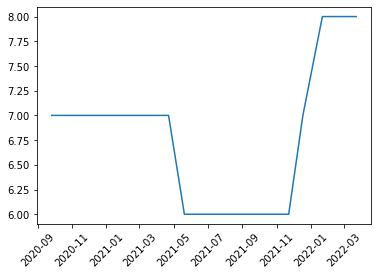

In [9]:
plt.plot(ladiesofwrestling_mod_data['timestamp'], ladiesofwrestling_mod_data['num_mods'], '-')
plt.xticks(rotation = 45)
plt.show()

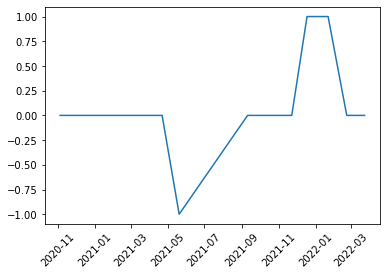

In [10]:
plt.plot(ladiesofwrestling_mod_data['timestamp'], ladiesofwrestling_mod_data['mod_churn'], '-')
plt.xticks(rotation = 45)
plt.show()

In [11]:
ladiesofwrestling_rules_data = select_subreddit('ladiesofwrestling', rules_count_data)
ladiesofwrestling_rules_data["rule_churn"] = ladiesofwrestling_rules_data["num_rules"] - ladiesofwrestling_rules_data["num_rules"].shift(1)
ladiesofwrestling_rules_data["time_diff"] = ladiesofwrestling_rules_data["timestamp"].diff()
ladiesofwrestling_rules_data

/tmp/ipykernel_61/869360740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ladiesofwrestling_rules_data["rule_churn"] = ladiesofwrestling_rules_data["num_rules"] - ladiesofwrestling_rules_data["num_rules"].shift(1)
/tmp/ipykernel_61/869360740.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ladiesofwrestling_rules_data["time_diff"] = ladiesofwrestling_rules_data["timestamp"].diff()


,subreddit,timestamp,rules_json,num_rules,rule_churn,time_diff
2,ladiesofwrestling,2020-09-25 08:51:25,"{""rules"": [{""kind"": ""all"", ""description"": """", ...",6,NaN,NaT
206,ladiesofwrestling,2020-11-04 05:19:31,"{""rules"": [{""kind"": ""all"", ""description"": """", ...",7,1.0,39 days 20:28:06
611,ladiesofwrestling,2020-12-03 13:06:07,"{""rules"": [{""kind"": ""all"", ""description"": """", ...",7,0.0,29 days 07:46:36
816,ladiesofwrestling,2021-01-03 17:58:42,"{""rules"": [{""kind"": ""all"", ""description"": """", ...",7,0.0,31 days 04:52:35
1020,ladiesofwrestling,2021-01-26 14:16:46,"{""rules"": [{""kind"": ""all"", ""description"": """", ...",7,0.0,22 days 20:18:04
1224,ladiesofwrestling,2021-02-28 23:22:03,"{""rules"": [{""kind"": ""all"", ""description"": """", ...",8,1.0,33 days 09:05:17
1428,ladiesofwrestling,2021-04-21 23:32:53,"{""rules"": [{""kind"": ""all"", ""description"": """", ...",8,0.0,52 days 00:10:50
1632,ladiesofwrestling,2021-05-20 05:06:26,"{""rules"": [{""kind"": ""all"", ""description"": """", ...",8,0.0,28 days 05:33:33
1836,ladiesofwrestling,2021-07-01 05:07:58,"{""rules"": [{""kind"": ""all"", ""description"": """", ...",8,0.0,42 days 00:01:32
2040,ladiesofwrestling,2021-08-26 17:35:18,"{""rules"": [{""kind"": ""all"", ""description"": """", ...",8,0.0,56 days 12:27:20


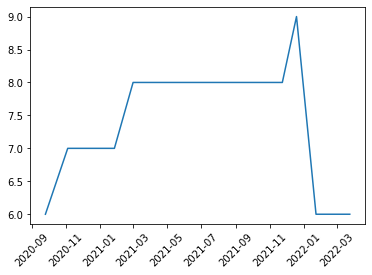

In [12]:
plt.plot(ladiesofwrestling_rules_data['timestamp'], ladiesofwrestling_rules_data['num_rules'], '-')
plt.xticks(rotation = 45)
plt.show()

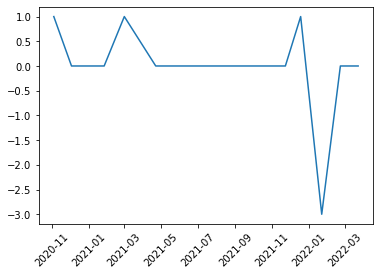

In [13]:
plt.plot(ladiesofwrestling_rules_data['timestamp'], ladiesofwrestling_rules_data['rule_churn'], '-')
plt.xticks(rotation = 45)
plt.show()

In [14]:
ladiesofwrestling_subscribers_data = select_subreddit('ladiesofwrestling', subscribers_count_data)
ladiesofwrestling_subscribers_data["subscribers_churn"] = ladiesofwrestling_subscribers_data["num_subscribers"] - ladiesofwrestling_subscribers_data["num_subscribers"].shift(1)
ladiesofwrestling_subscribers_data["time_diff"] = ladiesofwrestling_subscribers_data["timestamp"].diff()
ladiesofwrestling_subscribers_data

/tmp/ipykernel_61/1679656225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ladiesofwrestling_subscribers_data["subscribers_churn"] = ladiesofwrestling_subscribers_data["num_subscribers"] - ladiesofwrestling_subscribers_data["num_subscribers"].shift(1)
/tmp/ipykernel_61/1679656225.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ladiesofwrestling_subscribers_data["time_diff"] = ladiesofwrestling_subscribers_data["timestamp"].diff()


,subreddit,timestamp,meta_json,num_subscribers,subscribers_churn,time_diff
2,ladiesofwrestling,2020-09-25 08:51:25,"{""kind"": ""t5"", ""data"": {""user_flair_background...",21218,NaN,NaT
206,ladiesofwrestling,2020-11-04 05:19:31,"{""kind"": ""t5"", ""data"": {""user_flair_background...",22017,799.0,39 days 20:28:06
611,ladiesofwrestling,2020-12-03 13:06:07,"{""kind"": ""t5"", ""data"": {""user_flair_background...",22725,708.0,29 days 07:46:36
816,ladiesofwrestling,2021-01-03 17:58:42,"{""kind"": ""t5"", ""data"": {""user_flair_background...",23495,770.0,31 days 04:52:35
1020,ladiesofwrestling,2021-01-26 14:16:46,"{""kind"": ""t5"", ""data"": {""user_flair_background...",24106,611.0,22 days 20:18:04
1224,ladiesofwrestling,2021-02-28 23:22:02,"{""kind"": ""t5"", ""data"": {""user_flair_background...",25215,1109.0,33 days 09:05:16
1428,ladiesofwrestling,2021-04-21 23:32:53,"{""kind"": ""t5"", ""data"": {""user_flair_background...",27115,1900.0,52 days 00:10:51
1632,ladiesofwrestling,2021-05-20 05:06:26,"{""kind"": ""t5"", ""data"": {""user_flair_background...",27926,811.0,28 days 05:33:33
1836,ladiesofwrestling,2021-07-01 05:07:57,"{""kind"": ""t5"", ""data"": {""user_flair_background...",28985,1059.0,42 days 00:01:31
2040,ladiesofwrestling,2021-08-26 17:35:18,"{""kind"": ""t5"", ""data"": {""user_flair_background...",30235,1250.0,56 days 12:27:21


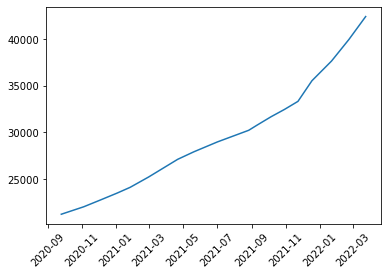

In [15]:
plt.plot(pd.to_datetime(ladiesofwrestling_subscribers_data['timestamp']).dt.date, ladiesofwrestling_subscribers_data['num_subscribers'], '-')
plt.xticks(rotation = 45)
plt.show()

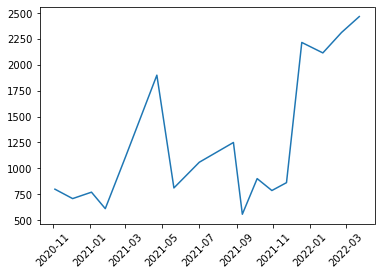

In [16]:
plt.plot(ladiesofwrestling_subscribers_data['timestamp'], ladiesofwrestling_subscribers_data['subscribers_churn'], '-')
plt.xticks(rotation = 45)
plt.show()

In [17]:
new = ladiesofwrestling_rules_data.join(ladiesofwrestling_rules_data['rules_json'].apply(json.loads).apply(pd.Series))
new['rules']

2       [{'kind': 'all', 'description': '', 'short_nam...
206     [{'kind': 'all', 'description': '', 'short_nam...
611     [{'kind': 'all', 'description': '', 'short_nam...
816     [{'kind': 'all', 'description': '', 'short_nam...
1020    [{'kind': 'all', 'description': '', 'short_nam...
1224    [{'kind': 'all', 'description': '', 'short_nam...
1428    [{'kind': 'all', 'description': '', 'short_nam...
1632    [{'kind': 'all', 'description': '', 'short_nam...
1836    [{'kind': 'all', 'description': '', 'short_nam...
2040    [{'kind': 'all', 'description': '', 'short_nam...
2244    [{'kind': 'all', 'description': '', 'short_nam...
2448    [{'kind': 'all', 'description': '', 'short_nam...
2652    [{'kind': 'all', 'description': '', 'short_nam...
2856    [{'kind': 'all', 'description': '', 'short_nam...
3060    [{'kind': 'all', 'description': '', 'short_nam...
3264    [{'kind': 'all', 'description': '* Please incl...
3467    [{'kind': 'all', 'description': '* Please incl...
3671    [{'kin

In [18]:
def mod_churn(df):    
    new_df = df.join(df['mods_json'].apply(json.loads).apply(pd.Series))
    data = new_df['data']
    set1 = set()
    set2 = set()
    gained = []
    lost = []

    for x in data:
        set2 = set()
        for y in x['children']:
            name = y['name']
            set2.add(name)
        if(len(set1) == 0):
            gained.append(0)
            lost.append(0)
        else:
            diff = 0
            for name in set1:
                if(name not in set2):
                    diff += 1
            lost.append(diff)
            diff = 0
            for name in set2:
                if(name not in set1):
                    diff += 1
            gained.append(diff)
        set1 = set2.copy()
    return gained, lost

In [19]:
ladiesofwrestling_gained, ladiesofwrestling_lost = mod_churn(ladiesofwrestling_mod_data)

In [20]:
ladiesofwrestling_mod_data['mods_gained'] = ladiesofwrestling_gained
ladiesofwrestling_mod_data['mods_lost'] = ladiesofwrestling_lost
ladiesofwrestling_mod_data

/tmp/ipykernel_61/161198716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ladiesofwrestling_mod_data['mods_gained'] = ladiesofwrestling_gained
/tmp/ipykernel_61/161198716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ladiesofwrestling_mod_data['mods_lost'] = ladiesofwrestling_lost


,subreddit,timestamp,mods_json,num_mods,mod_churn,time_diff,mods_gained,mods_lost
2,ladiesofwrestling,2020-09-25 08:51:25,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",7,NaN,NaT,0,0
206,ladiesofwrestling,2020-11-04 05:19:31,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",7,0.0,39 days 20:28:06,0,0
611,ladiesofwrestling,2020-12-03 13:06:07,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",7,0.0,29 days 07:46:36,0,0
816,ladiesofwrestling,2021-01-03 17:58:42,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",7,0.0,31 days 04:52:35,0,0
1020,ladiesofwrestling,2021-01-26 14:16:46,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",7,0.0,22 days 20:18:04,0,0
1224,ladiesofwrestling,2021-02-28 23:22:03,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",7,0.0,33 days 09:05:17,0,0
1428,ladiesofwrestling,2021-04-21 23:32:53,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",7,0.0,52 days 00:10:50,0,0
1632,ladiesofwrestling,2021-05-20 05:06:26,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",6,-1.0,28 days 05:33:33,0,1
1835,ladiesofwrestling,2021-09-10 11:55:00,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",6,0.0,113 days 06:48:34,0,0
2039,ladiesofwrestling,2021-10-05 00:50:05,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",6,0.0,24 days 12:55:05,0,0


In [21]:
ladiesofwrestling_mod_data

,subreddit,timestamp,mods_json,num_mods,mod_churn,time_diff,mods_gained,mods_lost
2,ladiesofwrestling,2020-09-25 08:51:25,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",7,NaN,NaT,0,0
206,ladiesofwrestling,2020-11-04 05:19:31,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",7,0.0,39 days 20:28:06,0,0
611,ladiesofwrestling,2020-12-03 13:06:07,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",7,0.0,29 days 07:46:36,0,0
816,ladiesofwrestling,2021-01-03 17:58:42,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",7,0.0,31 days 04:52:35,0,0
1020,ladiesofwrestling,2021-01-26 14:16:46,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",7,0.0,22 days 20:18:04,0,0
1224,ladiesofwrestling,2021-02-28 23:22:03,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",7,0.0,33 days 09:05:17,0,0
1428,ladiesofwrestling,2021-04-21 23:32:53,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",7,0.0,52 days 00:10:50,0,0
1632,ladiesofwrestling,2021-05-20 05:06:26,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",6,-1.0,28 days 05:33:33,0,1
1835,ladiesofwrestling,2021-09-10 11:55:00,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",6,0.0,113 days 06:48:34,0,0
2039,ladiesofwrestling,2021-10-05 00:50:05,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",6,0.0,24 days 12:55:05,0,0


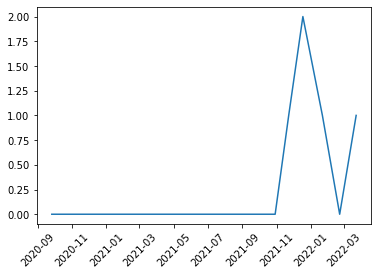

In [22]:
plt.plot(ladiesofwrestling_mod_data['timestamp'], ladiesofwrestling_mod_data['mods_gained'], '-')
plt.xticks(rotation = 45)
plt.show()

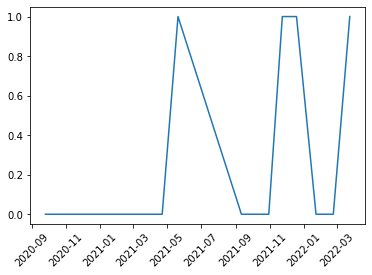

In [23]:
plt.plot(ladiesofwrestling_mod_data['timestamp'], ladiesofwrestling_mod_data['mods_lost'], '-')
plt.xticks(rotation = 45)
plt.show()

In [24]:
gratefuldead_mod_data = select_subreddit('gratefuldead', mod_count_data)
gratefuldead_mod_data["mod_churn"] = gratefuldead_mod_data["num_mods"] - gratefuldead_mod_data["num_mods"].shift(1)
gratefuldead_mod_data["time_diff"] = gratefuldead_mod_data["timestamp"].diff()

/tmp/ipykernel_61/488368728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gratefuldead_mod_data["mod_churn"] = gratefuldead_mod_data["num_mods"] - gratefuldead_mod_data["num_mods"].shift(1)
/tmp/ipykernel_61/488368728.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gratefuldead_mod_data["time_diff"] = gratefuldead_mod_data["timestamp"].diff()


In [25]:
gratefuldead_gained, gratefuldead_lost = mod_churn(gratefuldead_mod_data)
gratefuldead_mod_data['mods_gained'] = gratefuldead_gained
gratefuldead_mod_data['mods_lost'] = gratefuldead_lost
gratefuldead_mod_data

/tmp/ipykernel_61/3804825722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gratefuldead_mod_data['mods_gained'] = gratefuldead_gained
/tmp/ipykernel_61/3804825722.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gratefuldead_mod_data['mods_lost'] = gratefuldead_lost


,subreddit,timestamp,mods_json,num_mods,mod_churn,time_diff,mods_gained,mods_lost
172,gratefuldead,2020-10-04 22:35:54,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",224,NaN,NaT,0,0
377,gratefuldead,2020-11-16 18:31:33,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",225,1.0,42 days 19:55:39,1,0
440,gratefuldead,2020-11-26 03:52:37,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",225,0.0,9 days 09:21:04,0,0
645,gratefuldead,2020-12-30 01:55:55,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",226,1.0,33 days 22:03:18,1,0
850,gratefuldead,2021-01-21 19:02:51,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",226,0.0,22 days 17:06:56,0,0
1054,gratefuldead,2021-02-20 17:34:36,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",227,1.0,29 days 22:31:45,1,0
1258,gratefuldead,2021-04-13 15:49:17,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",226,-1.0,51 days 22:14:41,0,1
1462,gratefuldead,2021-05-12 05:16:05,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",226,0.0,28 days 13:26:48,0,0
1665,gratefuldead,2021-09-02 23:56:08,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",229,3.0,113 days 18:40:03,3,0
1869,gratefuldead,2021-09-25 21:16:39,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",230,1.0,22 days 21:20:31,1,0


In [26]:
terraria_mod_data = select_subreddit('terraria', mod_count_data)
terraria_mod_data["mod_churn"] = terraria_mod_data["num_mods"] - terraria_mod_data["num_mods"].shift(1)
terraria_mod_data["time_diff"] = terraria_mod_data["timestamp"].diff()

/tmp/ipykernel_61/1953333175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terraria_mod_data["mod_churn"] = terraria_mod_data["num_mods"] - terraria_mod_data["num_mods"].shift(1)
/tmp/ipykernel_61/1953333175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terraria_mod_data["time_diff"] = terraria_mod_data["timestamp"].diff()


In [27]:
terraria_gained, terraria_lost = mod_churn(terraria_mod_data)
terraria_mod_data['mods_gained'] = terraria_gained
terraria_mod_data['mods_lost'] = terraria_lost
terraria_mod_data

/tmp/ipykernel_61/337529794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terraria_mod_data['mods_gained'] = terraria_gained
/tmp/ipykernel_61/337529794.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terraria_mod_data['mods_lost'] = terraria_lost


,subreddit,timestamp,mods_json,num_mods,mod_churn,time_diff,mods_gained,mods_lost
115,terraria,2020-10-04 10:32:21,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",13,NaN,NaT,0,0
320,terraria,2020-11-16 12:33:33,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",17,4.0,43 days 02:01:12,6,2
497,terraria,2020-11-26 10:12:46,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",17,0.0,9 days 21:39:13,0,0
702,terraria,2020-12-30 08:09:54,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",16,-1.0,33 days 21:57:08,0,1
907,terraria,2021-01-22 01:50:20,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",16,0.0,22 days 17:40:26,0,0
1111,terraria,2021-02-21 04:41:33,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",15,-1.0,30 days 02:51:13,0,1
1315,terraria,2021-04-14 03:13:26,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",14,-1.0,51 days 22:31:53,0,1
1519,terraria,2021-05-12 14:57:07,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",14,0.0,28 days 11:43:41,0,0
1722,terraria,2021-09-03 09:59:29,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",14,0.0,113 days 19:02:22,1,1
1926,terraria,2021-09-26 07:16:33,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",14,0.0,22 days 21:17:04,0,0


In [28]:
def loop_mod_df(df):
    for i in range(len(df)):
        row = df.iloc[i]
        

In [29]:
sorted_mod_data = mod_count_data.sort_values(by=['subreddit', 'timestamp'])
sorted_mod_data.head(20)

,subreddit,timestamp,mods_json,num_mods
80,4chanmeta,2020-10-03 03:00:22,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",15
284,4chanmeta,2020-11-15 23:14:32,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",14
533,4chanmeta,2020-11-27 03:28:12,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",14
738,4chanmeta,2020-12-31 01:15:31,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",14
943,4chanmeta,2021-01-22 18:45:19,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",14
1147,4chanmeta,2021-02-22 10:22:29,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",14
1351,4chanmeta,2021-04-15 09:15:17,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",14
1555,4chanmeta,2021-05-13 16:51:16,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",14
1758,4chanmeta,2021-09-04 13:24:02,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",15
1962,4chanmeta,2021-09-28 15:29:41,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",15


In [30]:
terraria_mod_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 115 to 3353
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   subreddit    17 non-null     object         
 1   timestamp    17 non-null     datetime64[ns] 
 2   mods_json    17 non-null     object         
 3   num_mods     17 non-null     int64          
 4   mod_churn    16 non-null     float64        
 5   time_diff    16 non-null     timedelta64[ns]
 6   mods_gained  17 non-null     int64          
 7   mods_lost    17 non-null     int64          
dtypes: datetime64[ns](1), float64(1), int64(3), object(2), timedelta64[ns](1)
memory usage: 1.7+ KB


In [31]:
mods_gained, mods_lost = mod_churn(sorted_mod_data)
sorted_mod_data['mods_gained'] = mods_gained
sorted_mod_data['mods_lost'] = mods_lost
sorted_mod_data.sample(50)

,subreddit,timestamp,mods_json,num_mods,mods_gained,mods_lost
1147,4chanmeta,2021-02-22 10:22:29,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",14,0,0
1334,classicalmemes,2021-04-14 15:36:42,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",3,0,0
3372,classicalmemes,2022-04-12 06:18:26,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",3,0,0
92,nongolfers,2020-10-03 19:29:56,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",9,9,2
3027,sciencehumour,2022-02-18 07:40:32,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",3,0,0
1366,gtagifs,2021-04-16 00:34:42,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",4,0,0
1770,imaginarywildlands,2021-09-04 23:25:56,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",4,0,0
2014,deathstranding,2021-10-03 03:15:04,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",15,0,0
759,celebsbr,2020-12-31 12:38:19,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",7,1,0
742,starwarsmemes,2020-12-31 03:27:18,"{""kind"": ""UserList"", ""data"": {""children"": [{""n...",7,1,0
